In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import data
path = "/Users/Glebazzz/Jupiter/04.25 Instacart Basket Analysis" 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_merged_customers.pkl'))

<Axes: xlabel='orders_day_of_week'>

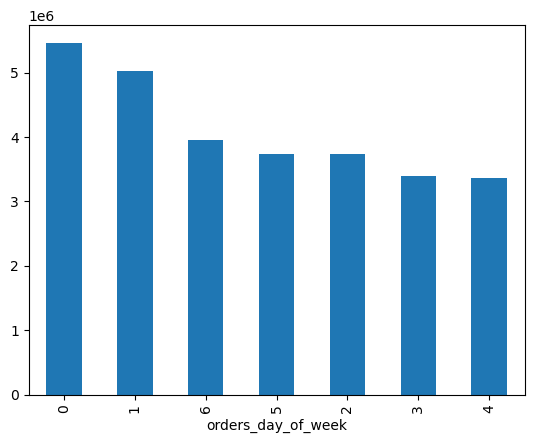

In [4]:
#Create bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

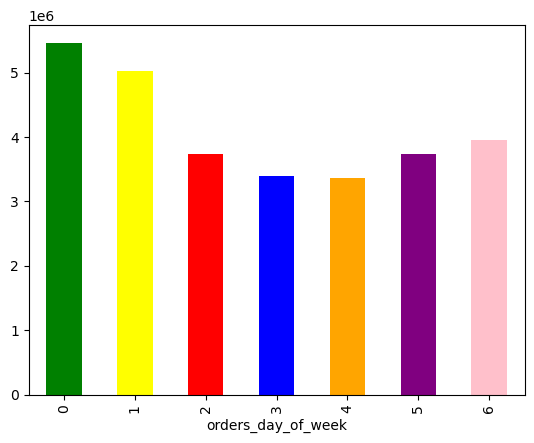

In [6]:
# sort bars add colour
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['green', 'yellow', 'red', 'blue', 'orange', 'purple', 'pink'])

In [10]:
# save chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

#### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

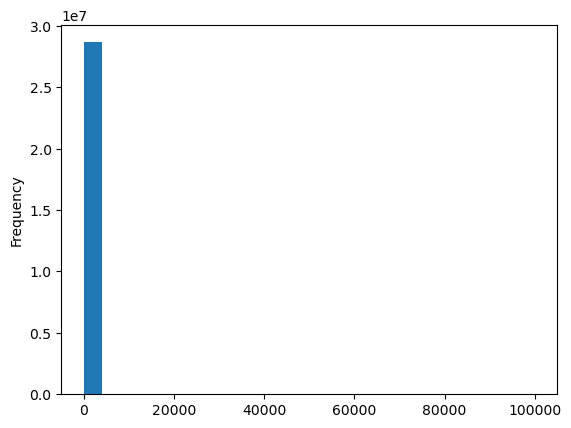

In [13]:
# create price hystogram 
ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
#consistency check
ords_prods_merge['prices']. describe()

count    2.866805e+07
mean     1.191370e+01
std      4.923769e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

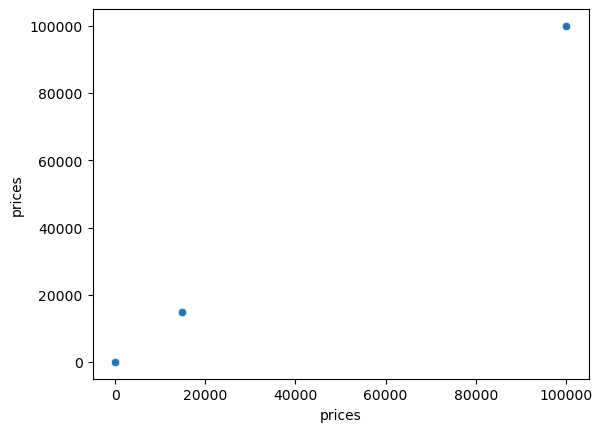

In [17]:
# create scatter plot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
#identification of data points above a certain threshold
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour,...,First Name,Second Name,Gender,State,Age,date_joined,houshold,fam_status,income USD,_merge
11587079,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
11587080,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
11587081,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both
11587082,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2856927,618,2,5,12,...,Harold,Mcclain,Male,Colorado,76,3/31/2020,0,divorced/widowed,206652,both
11587083,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1871776,618,3,6,13,...,Harold,Mcclain,Male,Colorado,76,3/31/2020,0,divorced/widowed,206652,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19273946,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156,both
19273947,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156,both
19273948,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,Shirley,Ellis,Female,Missouri,78,11/9/2019,3,married,137004,both
19273949,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,Victor,Rivers,Male,Arizona,78,8/9/2018,3,married,294898,both


In [22]:
# Mark treshhold data as NANs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
# check the result 
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

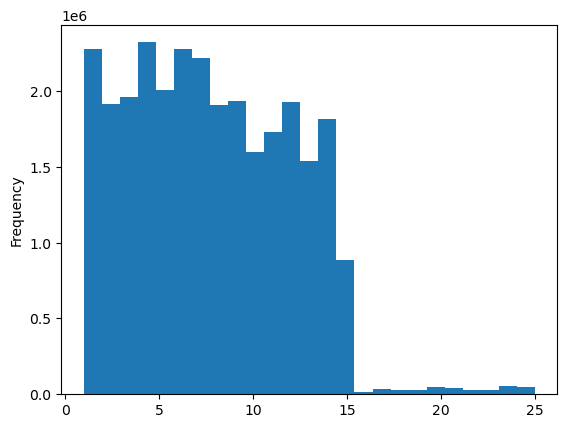

In [26]:
# create price hystogram 
ords_prods_merge['prices'].plot.hist(bins = 25)

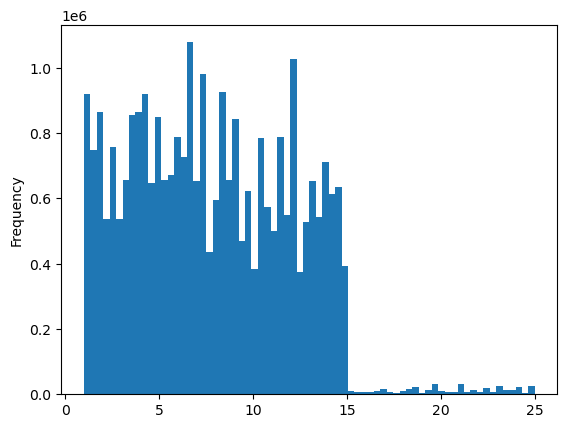

In [28]:
# change number of bins 
hyst = ords_prods_merge['prices'].plot.hist(bins = 70)

In [30]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [32]:
#store 70% of sample in the df big and 30% in df small
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [33]:
# Checking the length of the original df
len(ords_prods_merge)

28668049

In [36]:
# Checking the length of big+small df's
len(big)+len(small)

28668049

In [38]:
# create df only with necessary colomns 
df_2 = small[['orders_day_of_week','prices']]

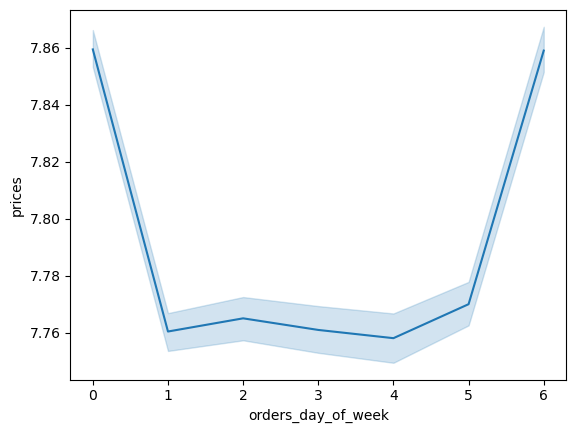

In [40]:
# create a line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Exercise

In [43]:
# order_hour_of_day hystogram 
ords_prods_merge

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour,...,First Name,Second Name,Gender,State,Age,date_joined,houshold,fam_status,income USD,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28668044,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,...,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,both
28668045,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,...,Robin,Ward,Female,Rhode Island,47,9/13/2017,1,married,166687,both
28668046,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,both
28668047,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,both


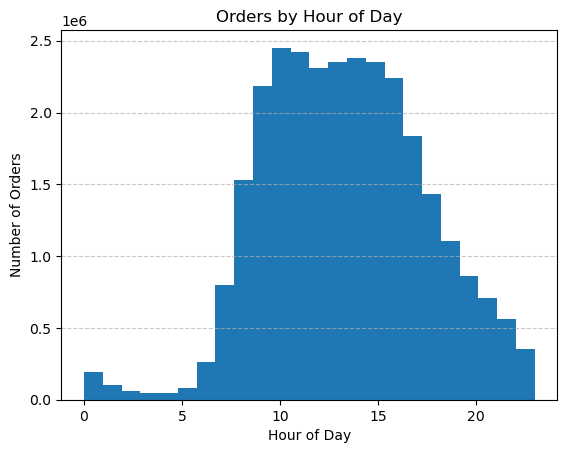

In [45]:
# order_hour_of_day hystogram 

orders_HOD = ords_prods_merge['hour'].plot.hist(bins=24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional for clearer visualization
plt.show()

Hystogram demostrates that most active hours are from 8 to 17

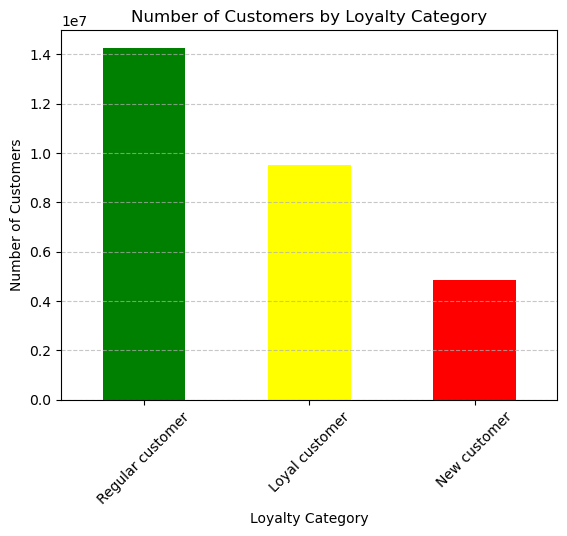

In [47]:

colors = ['green', 'yellow', 'red', 'blue', 'orange', 'purple', 'pink']

bar2 = ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color=colors)

plt.title('Number of Customers by Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # optional for better readability

plt.show()

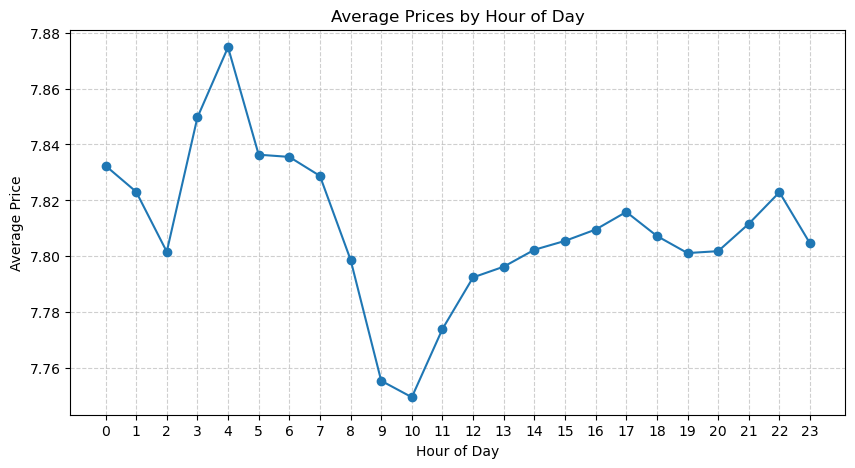

In [49]:
# Create DataFrame with only necessary columns
df_3 = small[['hour', 'prices']]

# Calculate average price per hour
avg_price_hour = df_3.groupby('hour')['prices'].mean()

# Plot line chart
plt.figure(figsize=(10,5))
Average_Prices_by_Hour_of_Day = avg_price_hour.plot(kind='line', marker='o')

# Add labels and title
plt.title('Average Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.xticks(range(0,24))
plt.grid(linestyle='--', alpha=0.6)

plt.show()

**Observations:**

- There is a drop in average price around hours 9 to 10, suggesting cheaper items are bought then.
- Slightly higher average prices occur early in the morning (around hours 0–6) and again from midday to evening (12–22).
- The confidence interval widens at the start and end of the day, likely due to fewer data points, increasing variability.


#### Suggestions for marketing:

- **Customers who shop early morning or late night may be buying higher-priced or specialty items.**
- **Promotions on lower-priced items could be targeted at mid-morning shoppers.**

# Exploratory analysis

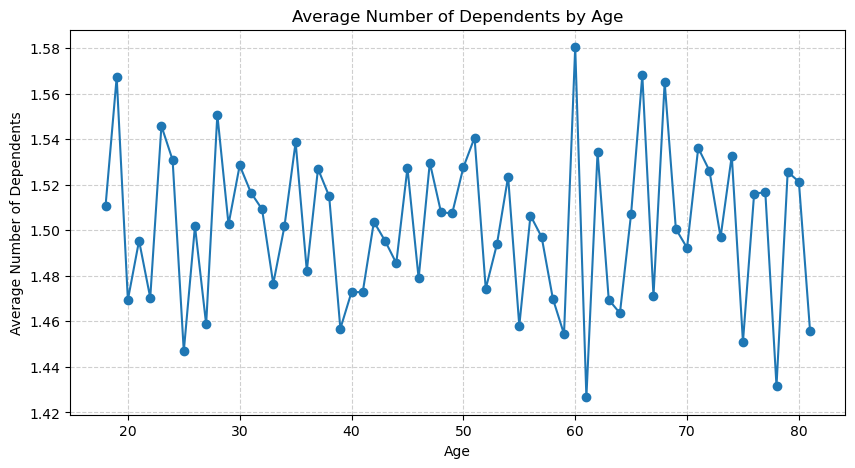

In [53]:

# Group by Age and calculate the average number of dependents
grouped = small.groupby('Age')['houshold'].mean().reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grouped['Age'], grouped['houshold'], marker='o')

# Add title and labels
ax.set_title('Average Number of Dependents by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Average Number of Dependents')
ax.grid(linestyle='--', alpha=0.6)

# Save the figure
fig.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Average_Number_of_Dependents_by_Age.png'))

# Show the plot
plt.show()

**Key observations:**
- The average number of dependents appears to fluctuate slightly across different ages, without a strong consistent trend.
- There is no clear upward or downward trajectory; the line is relatively flat with minor variations.
- This suggests that family situation (number of dependents) is not strongly correlated with age in this dataset.
- The variation spikes at certain ages may be due to fewer data points in those specific age groups, causing higher variability.

In [56]:
grouped

,Age,houshold
0,18,1.510423
1,19,1.567212
2,20,1.469412
3,21,1.495401
4,22,1.470372
...,...,...
59,77,1.516635
60,78,1.431608
61,79,1.525624
62,80,1.521321


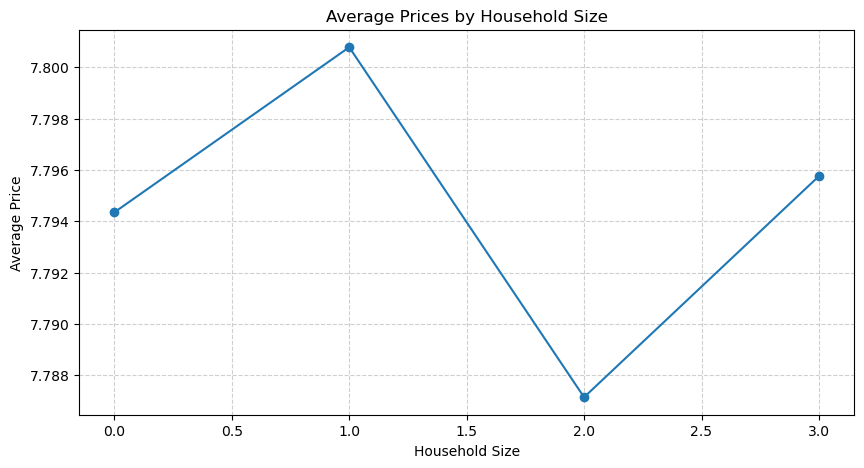

In [58]:
# Group by household size and calculate average prices
grouped = small.groupby('houshold')['prices'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(grouped['houshold'], grouped['prices'], marker='o')

# Add title and labels
plt.title('Average Prices by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Price')
plt.grid(linestyle='--', alpha=0.6)

plt.show()

# **Observations:**
- The line is relatively flat, indicating very little variation in average product prices across different household sizes.
- The average price hovers just below 7.81, showing no strong trend that suggests larger households consistently spend more or less per item.
- This implies that household size does not have a significant impact on the average price of purchased products.


In [61]:
ords_prods_merge.dtypes

product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
hour                         int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_value                  float64
spenders_flag               object
frequency                  float64
First Name                  object
Second Name                 object
Gender                      object
State                       object
Age                          int64
date_joined                 object
houshold            

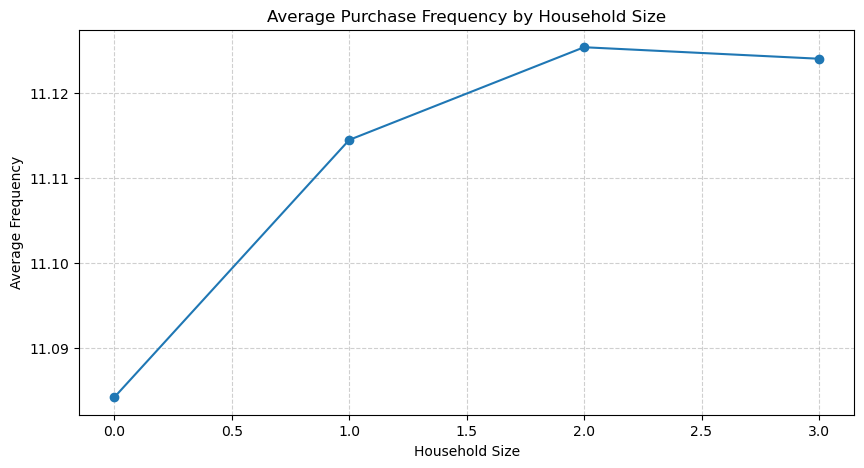

In [63]:
# Group by household size and calculate average frequency
grouped = small.groupby('houshold')['frequency'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(grouped['houshold'], grouped['frequency'], marker='o')

# Add title and labels
plt.title('Average Purchase Frequency by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Frequency')
plt.grid(linestyle='--', alpha=0.6)

plt.show()

**Key insights:**
- There is a slight increase in average purchase frequency as household size increases from 0 to 2 dependents.
- After 2 dependents, the frequency appears to plateau or slightly decline.
- This may suggest that households with up to 2 dependents shop more frequently, possibly due to growing needs, but larger households do not necessarily continue that trend.

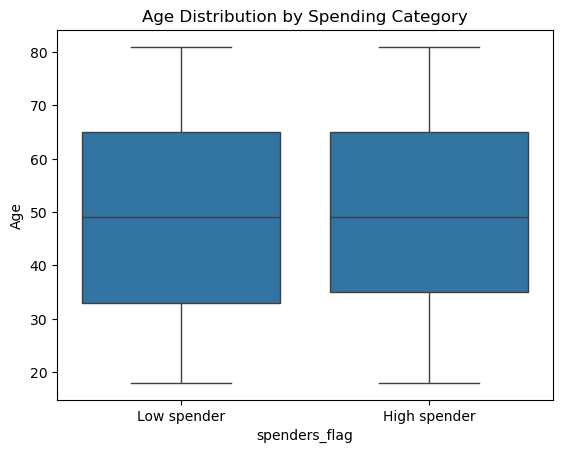

In [66]:
## Spending by Age Group
spenders = sns.boxplot(data=small, x='spenders_flag', y='Age')
plt.title('Age Distribution by Spending Category')
plt.show()

**Interpretation:**
- **Median Age:** Both groups have nearly the same median (around 49 years), indicating that age does not heavily influence spending category.
- **Spread (IQR):** The interquartile range is also similar, suggesting that both groups cover a wide range of ages.
- **Outliers:** Both categories include younger and older outliers (ages below 20 and above 80), showing diverse age representation in both spending groups.

#### Conclusion:

**There is no significant difference in age distribution between low and high spenders. Age alone is likely not a strong predictor of spending behavior in this dataset.**

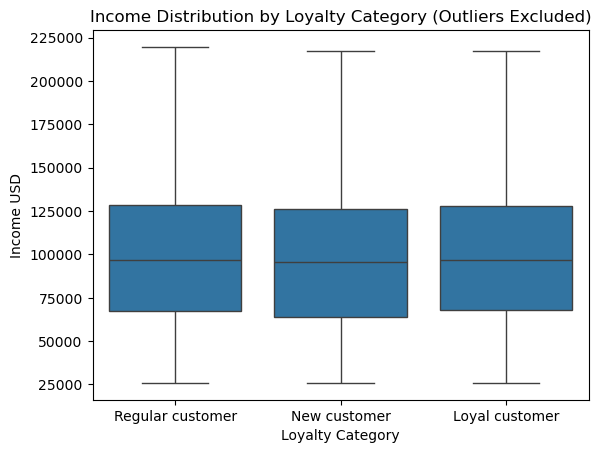

In [69]:
## Loyalty by Income
sns.boxplot(data=small, x='loyalty_flag', y='income USD', showfliers=False)
plt.title('Income Distribution by Loyalty Category (Outliers Excluded)')
plt.xlabel('Loyalty Category')
plt.ylabel('Income USD')
plt.show()

**Key observations:**
- Median income is fairly similar across all three groups, suggesting no drastic income difference by loyalty type.
- All categories have similar interquartile ranges, indicating that the central 50% of incomes are closely aligned.
- There are numerous high-income outliers in each category, especially above $200,000.
- No loyalty group dominates in terms of income level — meaning income alone might not explain loyalty behavior.

#### Conclusion:

**There doesn’t appear to be a strong link between income level and customer loyalty, so marketing efforts might need to focus on other behavioral factors (like frequency or basket size) rather than income alone.**

<Axes: xlabel='Age', ylabel='income USD'>

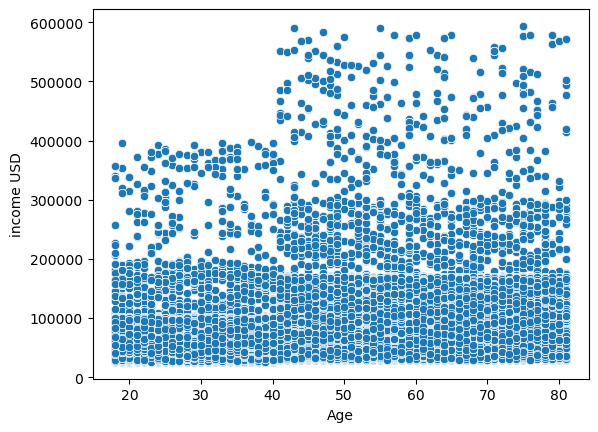

In [72]:
# create scatterplot age and spending power (income)
sns.scatterplot(x = 'Age', y = 'income USD',data = small)

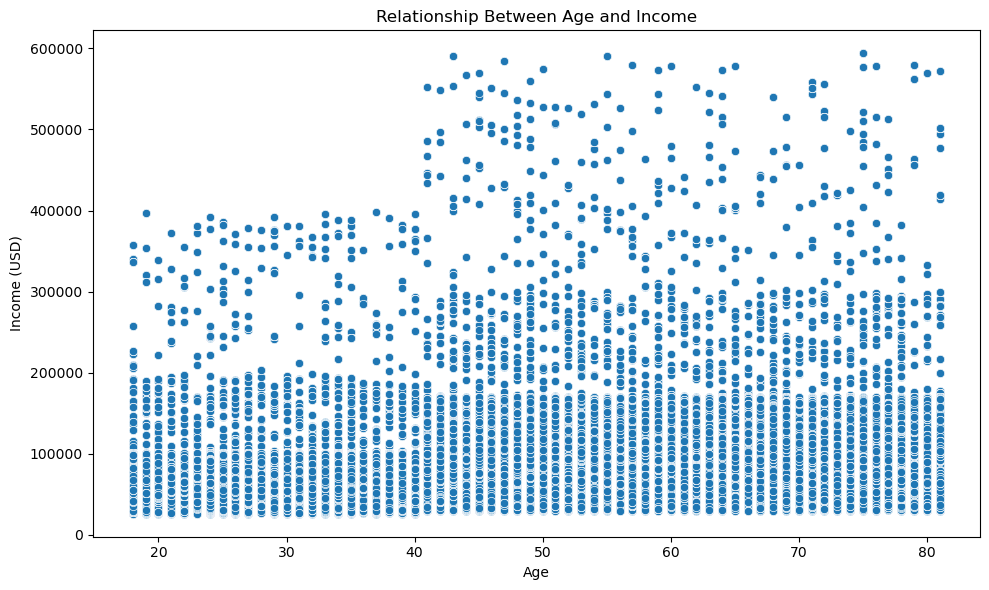

In [73]:
def create_age_income_scatterplot(data: pd.DataFrame) -> None:
    """
    Create a scatter plot showing the relationship between age and income.
    
    Args:
        data (pd.DataFrame): DataFrame containing 'age' and 'income USD' columns
        
    Returns:
        None: Displays the scatter plot
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='income USD', data=data)
    plt.title('Relationship Between Age and Income')
    plt.xlabel('Age')
    plt.ylabel('Income (USD)')
    plt.tight_layout()

# Call the function with your dataframe
create_age_income_scatterplot(ords_prods_merge)

This scatterplot illustrates the relationship between Age and Income (USD) of customers. Here’s what it shows:
- Income values are widely spread across all ages.
- There is no clear linear correlation: higher age doesn’t consistently lead to higher or lower income.
- The density of points is greater at lower income levels, regardless of age, suggesting that most customers have moderate incomes.
- A few high-income individuals appear across all age groups, showing that high earners aren’t limited to a specific age range.

**This suggests that age is not a strong predictor of income in this dataset, which is important for marketing segmentation decisions.**


In [76]:
# save charts
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_prices_hour.png'))

In [77]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_and_number_of_dependents.png'))

NameError: name 'line2' is not defined

In [79]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_bar.png'))

spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'spenders flag.png'))
orders_HOD.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'orders_HOD.png'))
Average_Prices_by_Hour_of_Day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Average_Prices_by_Hour_of_Day.png'))
Average_Number_of_Dependents_by_Age.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Average_Number_of_Dependents_by_Age.png'))

NameError: name 'Average_Number_of_Dependents_by_Age' is not defined

In [81]:
def create_age_income_scatterplot(
    data: pd.DataFrame,
    output_path: str,
    dpi: int = 300,
    figsize: tuple = (10, 6),
    title: str = "Relationship between Age and Income"
) -> None:
    """
    Creates and saves a scatter plot showing the relationship between age and income.
    
    Args:
        data (pd.DataFrame): DataFrame containing age and income columns.
        output_path (str): Path where the scatter plot image will be saved.
        dpi (int, optional): Resolution of the output image. Defaults to 300.
        figsize (tuple, optional): Figure size as (width, height). Defaults to (10, 6).
        title (str, optional): Title of the plot. Defaults to "Relationship between Age and Income".
        
    Returns:
        None: The function saves the plot to the specified path.
    """
    # Function implementation would go here
    pass

# Usage
create_age_income_scatterplot(
    data=ords_prods_merge,
    output_path='Jupiter/04.25 Instacart Basket Analysis/04 Analysis/Visualisations/scatter_age_income.png',
    dpi=300,
    figsize=(12, 8),
    title="Scatter Plot: Customer Age vs. Income"
)

In [83]:
# Export the updated DataFrame
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_4-9.pkl'))